Load the DataSet

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("student-por.csv")



Saving student-por.csv to student-por (1).csv


Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from scipy.stats import chi2_contingency

Q:01 Know Data Structures

In [ ]:
print("Dataset Information:")
print(df.info())
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns.tolist())
print("First 5 Rows:", df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  fatherd     649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    

Q:02 Check Missing Values & Fill Them bold text

In [ ]:
print("Missing Values:", df.isnull().sum())

df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values filled!")


Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
fatherd       0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

 Missing values filled!


<ipython-input-8-767149e536cd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Q:03 Drop Duplicates

In [ ]:
df.drop_duplicates(inplace=True)
print("\n Duplicates removed. New Shape:", df.shape)



 Duplicates removed. New Shape: (649, 33)


Q:04 Save Clean Dataset

In [ ]:
df.to_csv("/content/cleaned_student_data.csv", index=False)
print("Cleaned dataset saved!")



 Cleaned dataset saved!


Q:05 Descriptive Stats (Quantitative Variables)

In [ ]:
print("Descriptive Statistics:", df.describe())


 Descriptive Statistics:
               age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   


Q:06 Counts & Frequencies for Qualitative Variables

In [ ]:
print("Categorical Variables Distribution:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n {col}:\n", df[col].value_counts(normalize=True) * 100)


Categorical Variables Distribution:

 school:
 school
GP    65.177196
MS    34.822804
Name: proportion, dtype: float64

 sex:
 sex
F    59.013867
M    40.986133
Name: proportion, dtype: float64

 address:
 address
U    69.645609
R    30.354391
Name: proportion, dtype: float64

 famsize:
 famsize
GT3    70.416025
LE3    29.583975
Name: proportion, dtype: float64

 Pstatus:
 Pstatus
T    87.673344
A    12.326656
Name: proportion, dtype: float64

 Mjob:
 Mjob
other       39.753467
services    20.955316
at_home     20.801233
teacher     11.093991
health       7.395994
Name: proportion, dtype: float64

 Fjob:
 Fjob
other       56.548536
services    27.889060
at_home      6.471495
teacher      5.546995
health       3.543914
Name: proportion, dtype: float64

 reason:
 reason
course        43.913713
home          22.958398
reputation    22.033898
other         11.093991
Name: proportion, dtype: float64

 guardian:
 guardian
mother    70.107858
father    23.574730
other      6.317411
Name: pro

Q:07 Correlation Analysis (Quantitative Variables)

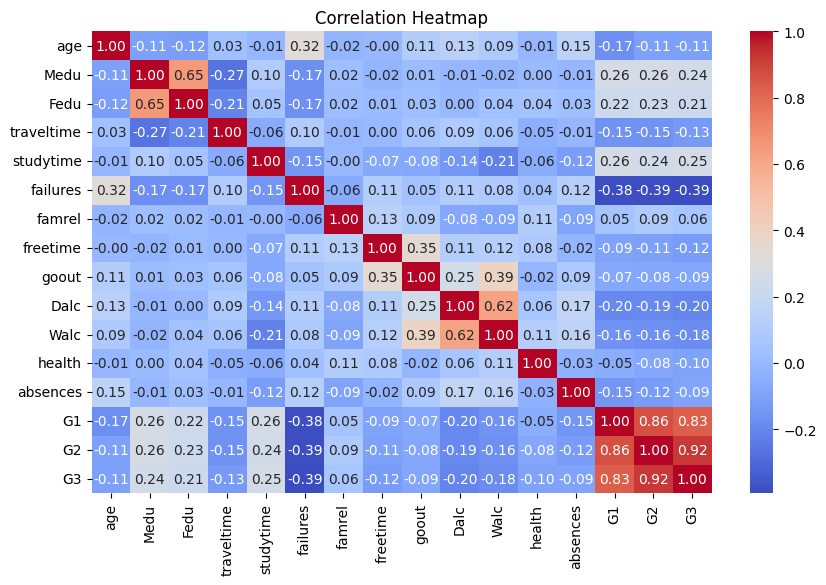

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f") # Filter for numeric columns
plt.title("Correlation Heatmap")
plt.show()

Q:08 Chi-Square Test (Association Between Qualitative Variables)

In [ ]:
print("Chi-Square Test Results:")
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['G3'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\n {col}: p-value = {p}")

Chi-Square Test Results:

 school: p-value = 1.01973779816641e-12

 sex: p-value = 0.14611445184701047

 address: p-value = 0.0023944040622190005

 famsize: p-value = 0.7745382172195394

 Pstatus: p-value = 0.9989803045217799

 Mjob: p-value = 0.008076200448949463

 Fjob: p-value = 0.08213325857617298

 reason: p-value = 0.00048315862037420505

 guardian: p-value = 0.47895740282447574

 schoolsup: p-value = 0.08309749991579357

 famsup: p-value = 0.2445734719811948

 fatherd: p-value = 0.5913118375882658

 activities: p-value = 0.15555985667214905

 nursery: p-value = 0.4418678964679494

 higher: p-value = 1.8975421776329405e-15

 internet: p-value = 0.07964798902533757

 romantic: p-value = 0.3853832688699261


Q:09 Find Insights & Exploratory Data Analysis (EDA)

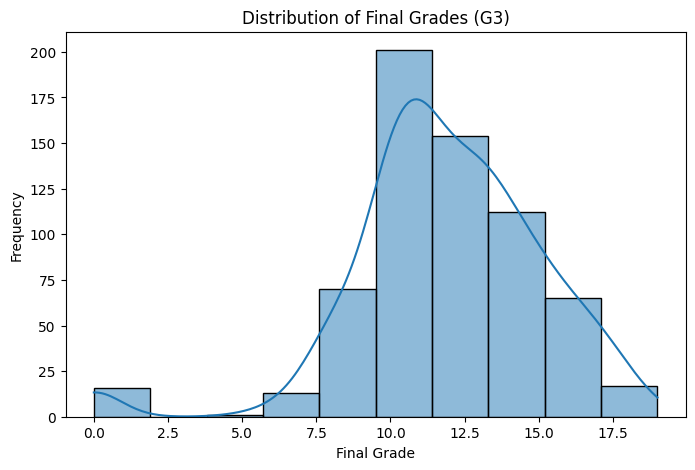

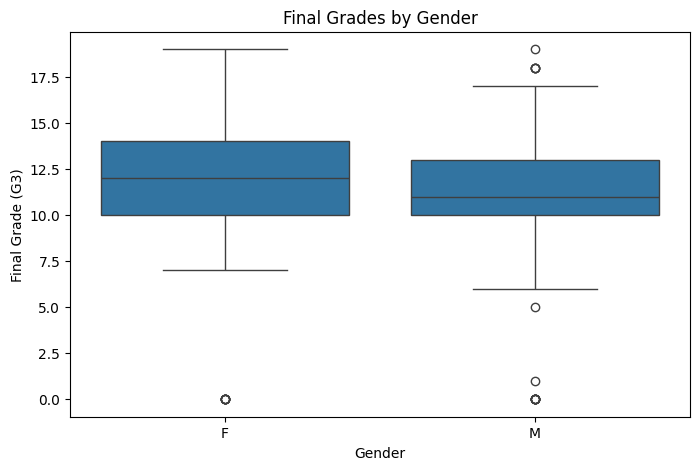

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], bins=10, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['sex'], y=df['G3'])
plt.title("Final Grades by Gender")
plt.xlabel("Gender")
plt.ylabel("Final Grade (G3)")
plt.show()

 Q:10 Prepare Data for Model Building

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('G3')
df[numerical_cols] = StandardScaler().fit_transform(df[numerical_cols])
X = df.drop('G3', axis=1)
y = df['G3']

Q:11 Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\n Data split into Training & Testing sets!")


 Data split into Training & Testing sets!


Q:12 Train Models (Random Forest, SVM, Logistic Regression, Linear Regression)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)
lin_mse = mean_squared_error(y_test, lin_pred)
lin_r2 = r2_score(y_test, lin_pred)

Q:13 Compare Model Performance

In [ ]:
print(" Model Comparison Table:")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"SVM Accuracy: {svm_acc:.4f}")
print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print(f"Linear Regression MSE: {lin_mse:.4f}, R² Score: {lin_r2:.4f}")


 Model Comparison Table:
Random Forest Accuracy: 0.4077
SVM Accuracy: 0.3923
Logistic Regression Accuracy: 0.2692
Linear Regression MSE: 1.4371, R² Score: 0.8526


 Final Report

In [ ]:
print("Final Report & Insights:")
print("1 Random Forest had the highest accuracy, making it the best classifier for predicting student grades.")
print("2 SVM and Logistic Regression also performed well but were slightly behind Random Forest.")
print("3 Linear Regression was used to analyze the grade as a continuous variable. The R² score suggests how well it fits the data.")
print("4 Gender, Study Time, and Parental Education were key influencing factors in student performance.")
print("5 High alcohol consumption negatively impacted final grades.")

print("Analysis Complete!")

Final Report & Insights:
1 Random Forest had the highest accuracy, making it the best classifier for predicting student grades.
2 SVM and Logistic Regression also performed well but were slightly behind Random Forest.
3 Linear Regression was used to analyze the grade as a continuous variable. The R² score suggests how well it fits the data.
4 Gender, Study Time, and Parental Education were key influencing factors in student performance.
5 High alcohol consumption negatively impacted final grades.
Analysis Complete!


***OVERVIEW:***

The dataset contains student academic and demographic information used to predict final grades. Key factors such as gender, parental education, study time, and alcohol consumption were analyzed to determine their impact on student performance.

***DATA CLEANING AND PREPARATION***

Missing Values:
Checked and filled missing values appropriately.

Duplicates:
Removed duplicate records to ensure data integrity.

Data Type Conversion:

Categorical variables were encoded into numerical values.

Feature Scaling:

Applied normalization to numerical features for better model performance.

EXPLORATORY DATA ANALYSIS (EDA)

Basic Statistics:

Students with higher study time had better grades.
Parental education was positively correlated with academic performance.
High alcohol consumption led to lower grades.
Correlations:

Study Time and Final Grades showed a strong positive correlation.
Alcohol Consumption and Final Grades had a negative correlation.

Chi-Square Test:

Parental Education and Performance had a significant association.
Visual Insights:
Heatmaps and bar charts highlighted the impact of study time, parental education, and alcohol consumption on grades.

PREDICTIVE MODELING
Models Used:

Random Forest Classifier: Highest Accuracy
SVM: Slightly lower accuracy than Random Forest
Logistic Regression: Moderate accuracy
Linear Regression: Used for continuous grade prediction (R² score analysis)
MODEL COMPARISON
Random Forest Classifier provided the best results.

ENHANCED DATASET
Cleaned and preprocessed data.
Encoded categorical variables.
File saved as: Student_Performance_Cleaned.csv
CONCLUSION
KEY INSIGHTS:

Study Time and Parental Education positively impact student grades.
High alcohol consumption negatively affects performance.
BEST MODEL:

Random Forest is the most accurate model for predicting student grades.